In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA COLLECTION**

In [6]:
df = pd.read_csv('/content/PSL-2016-2022.csv')
df.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,NaN,0,0,False,False,False,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,NaN,0,0,False,False,False,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,NaN,0,0,False,False,False,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,NaN,0,0,False,False,False,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,NaN,0,0,False,False,False,NaN,Gladiators


In [ ]:
df.describe()

,psl_year,match_number,inning,over,ball,runs,wicket,total_runs,wickets
count,50262.000000,50262.000000,50262.000000,50262.000000,50262.000000,50262.000000,2661.000000,50262.000000,50262.000000
mean,2019.245872,16.463551,1.481159,10.112013,3.608173,1.322251,1.696355,74.971728,2.550436
std,1.948857,9.545572,0.499650,5.640739,1.803698,1.627820,1.093840,48.173246,2.162274
min,2016.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2018.000000,8.000000,1.000000,5.000000,2.000000,0.000000,1.000000,35.000000,1.000000
50%,2019.000000,16.000000,1.000000,10.000000,4.000000,1.000000,1.000000,71.000000,2.000000
75%,2021.000000,24.000000,2.000000,15.000000,5.000000,1.000000,2.000000,111.000000,4.000000
max,2022.000000,34.000000,2.000000,20.000000,11.000000,7.000000,8.000000,247.000000,10.000000


## **DATA PREPROCESSING**

In [ ]:
df['wicket'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.])

In [7]:
df['wicket'].fillna(0,inplace = True)
df.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0.0,0,0,False,False,False,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0.0,0,0,False,False,False,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0.0,0,0,False,False,False,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0.0,0,0,False,False,False,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0.0,0,0,False,False,False,NaN,Gladiators


# **Exploratory Data Analysis (EDA):**

In [8]:
obj=df.groupby(['psl_year','match_number'])

def unique(df):
    return df["result"].unique()[0]

series =obj.apply(func =unique).value_counts()
series

Zalmi         43
United        41
Gladiators    36
Qalandars     30
Sultans       30
Kings         29
tied           4
no_result      2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Zalmi'),
  Text(1, 0, 'United'),
  Text(2, 0, 'Gladiators'),
  Text(3, 0, 'Qalandars'),
  Text(4, 0, 'Sultans'),
  Text(5, 0, 'Kings'),
  Text(6, 0, 'tied'),
  Text(7, 0, 'no_result')])

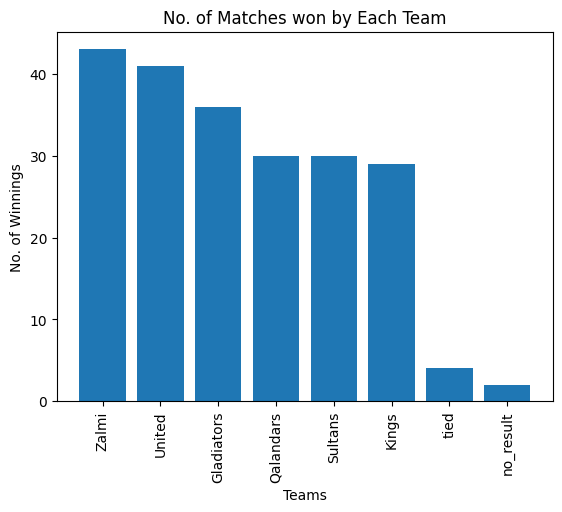

In [ ]:
plt.bar(series.index, series.values)
plt.title("No. of Matches won by Each Team")

plt.xlabel("Teams")
plt.ylabel("No. of Winnings")
plt.xticks(rotation ="vertical")

Text(0.5, 1.0, 'Percentage of Matches won by Each Team')

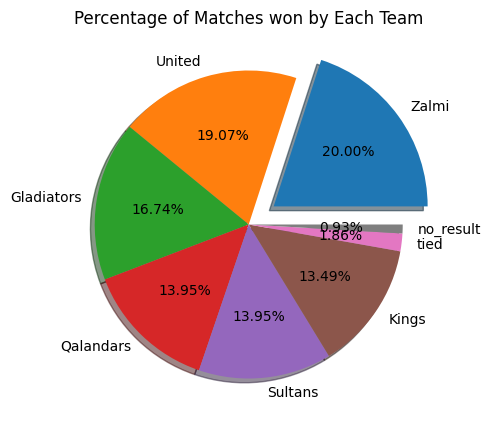

In [ ]:
plt.figure(figsize =(10, 5))
plt.pie(series.values, labels =series.index, shadow ="True", autopct ="%.2f%%", explode =[0.2, 0,0,0,0,0,0, 0])
plt.title("Percentage of Matches won by Each Team")

In [ ]:
boundries_df =df.groupby(['psl_year']).agg(
    fours = ('is_four','sum'),
    sixes = ('is_six','sum'),
    matches = ('match_number','max')

)
boundries_df = boundries_df.reset_index()
boundries_df



,psl_year,fours,sixes,matches
0,2016,566,247,24
1,2017,552,258,24
2,2018,774,414,34
3,2019,879,377,34
4,2020,873,383,34
5,2021,1010,437,34
6,2022,991,435,34


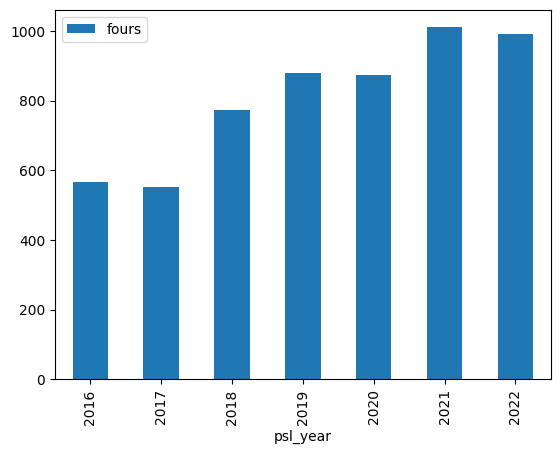

In [ ]:
ax =boundries_df.plot('psl_year', 'fours', kind='bar')

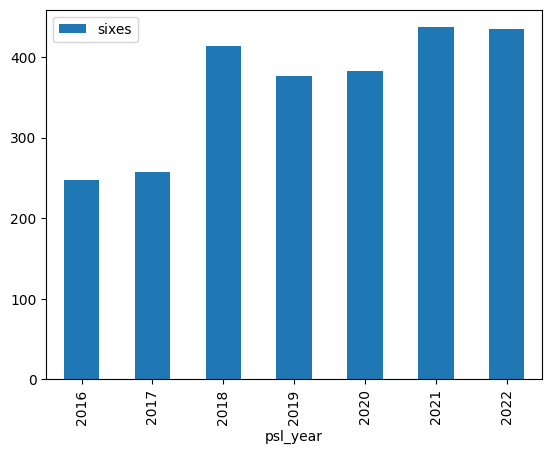

In [ ]:
ax = boundries_df.plot('psl_year', 'sixes', kind='bar')


<Axes: title={'center': 'Count of the Dismissal Type'}, xlabel='wicket_text', ylabel='No. Of Outs'>

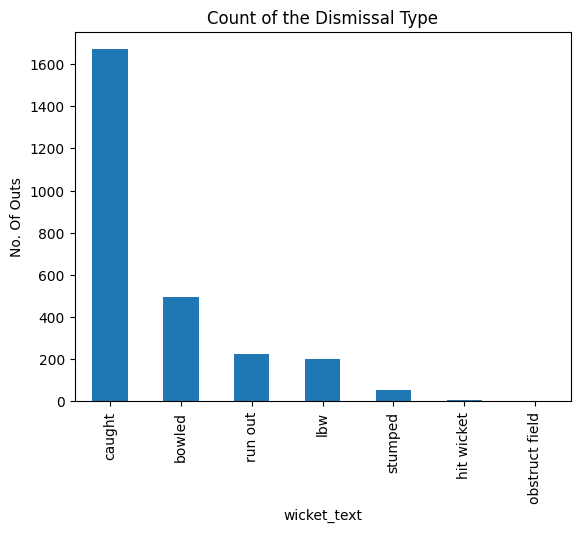

In [ ]:
obj =df.groupby(["wicket_text"])
series =obj["wicket_text"].value_counts().sort_values(ascending =False)
# count of the dismissal type
series.plot(kind ="bar", title="Count of the Dismissal Type", ylabel ="No. Of Outs")

# **Feature Engineering**

In [9]:
# Splitting on Innings
first_inning = df[df['inning']==1]
second_inning = df[df['inning']==2]
# Calculating Target
target_runs = first_inning.groupby(["psl_year","match_number"]).agg(
   target= ("runs","sum")
)
target_runs = target_runs.reset_index()
#new feature of target is added

In [10]:
new_df = pd.merge(target_runs, second_inning,  how='left', left_on=['psl_year','match_number'], right_on = ['psl_year','match_number'])

In [11]:
# added new feature of win
def win(row):
  if type(row['result']) == str:
    if row['result'] in row['team_2']:
      return 1
    return 0
  else:
      return 0
new_df['won']=new_df.apply(win,axis=1)


In [12]:
new_df['balls_left'] = 120-(((new_df['over']-1)*6)+new_df['ball'])
# new feature of balls_left is added

In [13]:
final_data = new_df[['over','ball','total_runs','wickets','target','balls_left','won']]
final_data['runs_left'] = final_data['target']- final_data['total_runs']
#added new feature of runs_left
final_data.head()

<ipython-input-13-1527f63f9759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['runs_left'] = final_data['target']- final_data['total_runs']


,over,ball,total_runs,wickets,target,balls_left,won,runs_left
0,1.0,1.0,0.0,0.0,128,119.0,1,128.0
1,1.0,2.0,0.0,0.0,128,118.0,1,128.0
2,1.0,3.0,0.0,0.0,128,117.0,1,128.0
3,1.0,4.0,2.0,0.0,128,116.0,1,126.0
4,1.0,5.0,2.0,0.0,128,115.0,1,126.0


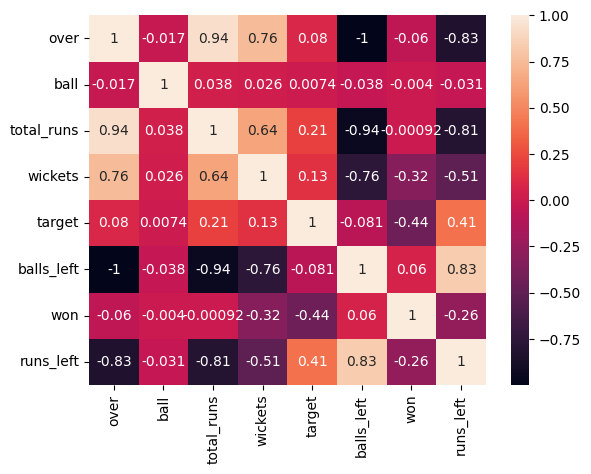

In [ ]:
corrMatrix = final_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
psl_df = final_data[['wickets','balls_left','runs_left','won']]
psl_df.head()

,wickets,balls_left,runs_left,won
0,0.0,119.0,128.0,1
1,0.0,118.0,128.0,1
2,0.0,117.0,128.0,1
3,0.0,116.0,126.0,1
4,0.0,115.0,126.0,1


In [19]:
psl_df = psl_df.dropna()